![img](https://github.com/MEmilyGomes/PCD---Criptografia-RSA/assets/172424897/8ab16e3d-9b90-4e14-b4ae-af54178c31fd) 


# <center>Temperatura crítica de materiais supercondutores: aprendizado de máquina</center> 
#### <center>Trabalho Final de Machine Learning - Ilum: Escola de Ciências, Campinas, 2024<center>

___________________

__Autor:__ Andriel Vinícius Martins Silva | andriel24044@ilum.cnpem.br
<br>
__Autor:__ Pedro Coelho Gimenes de Freitas | pedro24033@ilum.cnpem.br
<br>
__Autor:__ Rafael Dalacorte Erdmann | rafael24017@ilum.cnpem.br

____________________

# Sumário

* [I. Introdução](#introducao)
    * [I.I - Dataset](#dataset)
    * [I.II - Tratamento de dados](#tratamento)
* [II. Modelos](#modelos)
    * [II.I - Modelo BaseLine](#baseline)
    * [II.II - Modelos Lineares (LinearRegression e BayesianRidge)](#lineares)
    * [II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)](#knn)
    * [II.IV - Modelo de Floresta Aleatória](#floresta)
* [III. Conclusões](#conclusao)
* [IV. Referências](#referencias)


____________________

# <div id="introducao"> I. Introdução

<p style="text-align:justify;">A supercondutividade é um fenômeno associado à condução de corrente elétrica sem resistência em materiais abaixo de uma temperatura crítica específica (TC), isto é, a temperatura máxima na qual um material pode exibir supercondutividade (abaixo dessa temperatura, o material apresenta resistência elétrica zero)<sup><a href="#ref-1">[1]</a></sup>. Nesse sentido, diversas teorias, como a de Bardeen–Cooper–Schrieffer, explicam o surgimento da supercondutividade através da formação de pares de elétrons em estados ressonantes <sup><a href="#ref-2">[2]</a></sup>. Além disso, a manifestação da supercondutividade está diretamente associada à interação entre os elétrons e a rede cristalina do supercondutor, que influencia a dinâmica dos elétrons e a estrutura do material <sup><a href="#ref-3">[3]</a></sup>.

<p style="text-align:justify;">Um exemplo notável desse fenômeno é o uso de materiais supercondutores em aceleradores de partículas, como o Sirius, que permite realizar experimentos complexos em física de partículas e ciência dos materiais. No entanto, a busca por novos materiais supercondutores é frequentemente baseada em regras empíricas, o que pode ser um processo lento e custoso. Uma abordagem promissora para acelerar essa descoberta é a aplicação de técnicas computacionais, como simulações multifísicas, que permitem estudar os efeitos da supercondutividade em diferentes materiais <sup><a href="#ref-4">[4]</a></sup>. Apesar disso, os algoritmos de modelagem baseados em física requerem muitos recursos computacionais, tornando-os inadequados para previsões rápidas.

<p style="text-align:justify;">Nesse contexto, o surgimento de bancos de dados estruturados para materiais tem incentivado o desenvolvimento de modelos preditivos que analisam propriedades físico-químicas de materiais. Assim, a implementação de métodos de aprendizado de máquina pode facilitar a descoberta de novos materiais supercondutores, utilizando dados de materiais já conhecidos. A criação de ferramentas preditivas poderia reduzir os custos de produção de supercondutores com temperaturas críticas específicas e auxiliar os pesquisadores experimentais na busca por propriedades específicas. Ademais, a modelagem preditiva baseada em dados pode minimizar a necessidade de experimentos longos e dispendiosos, bem como simulações complexas baseadas em física que exigem alta demanda computacional. <sup><a href="#ref-5">[5]</a></sup>

<p style="text-align:justify;">À luz desta problemática, este trabalho tem como objetivo apresentar modelos que preveem as temperaturas críticas para materiais supercondutores inorgânicos. Para isso, será utilizado um conjunto de dados que contém informações sobre 21,263 supercondutores inorgânicos, conforme relatado por K. Hamidieh <sup><a href="#ref-1">[1]</a></sup>. Além disso, espera-se comparar os modelos desenvolvidos e discuti-los no contexto de suas potenciais aplicações na ciência de materiais, incluindo sua relevância para projetos como o acelerador de partículas Sirius.

## <div id="dataset"> I.I - Dataset

<p style="text-align:justify;">Os dados aqui utilizados, de nome <i>Superconductivty</i>, vieram do repositório UCI Machine Learning (UCIML). Ele possui dois arquivos com o mesmo número de observações (21.263) e mesmo target numérico (temperatura crítica de supercondutividade): um principal <code>train.csv</code> que possui 81 atributos numéricos de características medidas dos supercondutores (como densidade, condutividade térmica e afinidade eletrônica) e um secundário <code>unique-m.csv</code> com a composição de cada supercondutor (escrita por extenso na coluna <code>material</code> e com uma coluna de contagem para a proporção de cada um dos 86 elementos).

<p style="text-align:justify;">Por questão de simplicidade, neste caderno principal explicaremos os procedimentos e modelos utilizando apenas o arquivo principal, mas também utilizamos o <code>unique-m.csv</code> (isolado ou em conjunto com o <code>train.csv</code>) e o incluiremos na conclusão. Os códigos utilizados na obtenção dos resultados para o outro arquivo estão disponibilizados em nosso github.

    
<p style="text-align:justify;"><div class="alert alert-danger"><b>Obs: </b>Neste trabalho, utilizou-se um dataset disponível para consulta via python, a partir da biblioteca <b>UCIMLRepo</b>. Se você ainda não tem esta biblioteca instalada em seu dispositivo, execute o comando abaixo no próprio caderno Jupyter ou no console do anaconda:
    <b>!pip install ucimlrepo </b>
    

<p style="text-align:justify;">Inicialmente, é necessário importar o dataset da biblioteca <code>UCIMLRepo</code>. O <i>id</i> da base de dados de supercondutividade utilizada é 464. Após isso, determina-se o target e as features de interesse nas variáveis <code>X</code> e <code>y</code>, respectivamente.

In [1]:
# Para importar a base de dados de supercondutividade, utiliza-se o repositório uciml.

#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

# Baixar o dataset:
superconductivty_data = fetch_ucirepo(id=464) 

# Isola os atributos e os targets
X = superconductivty_data.data.features 
y = superconductivty_data.data.targets 

In [2]:
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


## <div id="tratamento"> I.II - Tratamento de dados

<p style="text-align:justify;">A base de dados utilizada neste projeto possui 81 colunas de atributos, mas alguns deles representam quantidades semelhantes. Portanto, para obter melhores modelos, analisaremos os atributos quanto à colinearidade dos dados através de um seletor de <i>fator de inflação de variância (VIF).</i>

In [3]:
from sklearn.linear_model import LinearRegression

def selecao_vif(df_atributos, limiar_vif):
    
    """Realiza a seleção de atributos por VIF.

    Argumentos:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo (usualmente, utiliza-se 5 ou 10)

    Retorna:
      DataFrame com os atributos selecionados.

    Função criada pelo Professor Dr. Daniel R. Cassar
    
    """
    
    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)

        else:
            break

    return df

limiar_VIF = 10

X_modificado = selecao_vif(X, limiar_VIF)

print(X_modificado)

       mean_atomic_mass  wtd_range_atomic_mass  std_atomic_mass   gmean_fie  \
0             88.944468              31.794921        51.968828  718.152900   
1             92.729214              36.161939        47.094633  720.605511   
2             88.944468              35.741099        51.968828  718.152900   
3             88.944468              33.768010        51.968828  718.152900   
4             88.944468              27.848743        51.968828  718.152900   
...                 ...                    ...              ...         ...   
21258        106.957877              15.504479        65.764081  651.611213   
21259         92.266740               7.353333        69.232655  702.115184   
21260         99.663190              53.041104         6.756810  730.207231   
21261         99.663190              31.115202         6.756810  730.207231   
21262         87.468333              43.144000        29.905282  852.858789   

       wtd_range_fie  mean_atomic_radius  wtd_range

<p style="text-align:justify;">Note que a quantidade de atribuitos diminuiu consideravelmente (de 81 para 29 features). Essa redução de 52 atributos indicia um processo eficaz de seleção de variáveis, o qual foca na relevância dos atributos e na redução da multicolinearidade. Isso não apenas melhora a interpretabilidade do modelo, mas também aumenta seu desempenho, ao minimizar o risco de overfitting e reduzir a complexidade computacional <sup><a href="#ref-6">[6]</a></sup>. Dessa maneira, os atributos utilizados para treinar os modelos serão:

In [4]:
print(X_modificado.columns)

Index(['mean_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'gmean_fie', 'wtd_range_fie', 'mean_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'mean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'gmean_FusionHeat', 'range_FusionHeat', 'wtd_range_FusionHeat',
       'wtd_std_FusionHeat', 'mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'gmean_Valence', 'range_Valence', 'wtd_range_Valence',
       'wtd_std_Valence'],
      dtype='object')


<p style="text-align:justify;">Agora, é necessário separar os atributos e targets em dados de teste (<code>x_teste</code> e <code>y_teste</code>) e de treino (<code>X_treino</code> e <code>y_treino</code>). Para isso, será utilizado o módulo <code>TrainSplitTest</code> do <code>Scikit-Learn</code>.

In [5]:
from sklearn.model_selection  import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=6969)

____________________

# <div id="modelos"> II. Modelos

<p style="text-align:justify;">Com os dados, utilizaremos alguns modelos de aprendizagem de máquina para encontrar uma solução à problemática.

## <div id="baseline"> II.I - Modelo BaseLine

<p style="text-align:justify;">Como referência, utilizaremos um modelo Baseline da média dos dados. Isso é, para qualquer entrada de atributo, o modelo retorna a média de todos os dados. Assim, obtemos um RMSE que nos informará se os modelos seguintes apresentam utilidade (afinal, não queremos nenhuma predição pior que retornar a média).

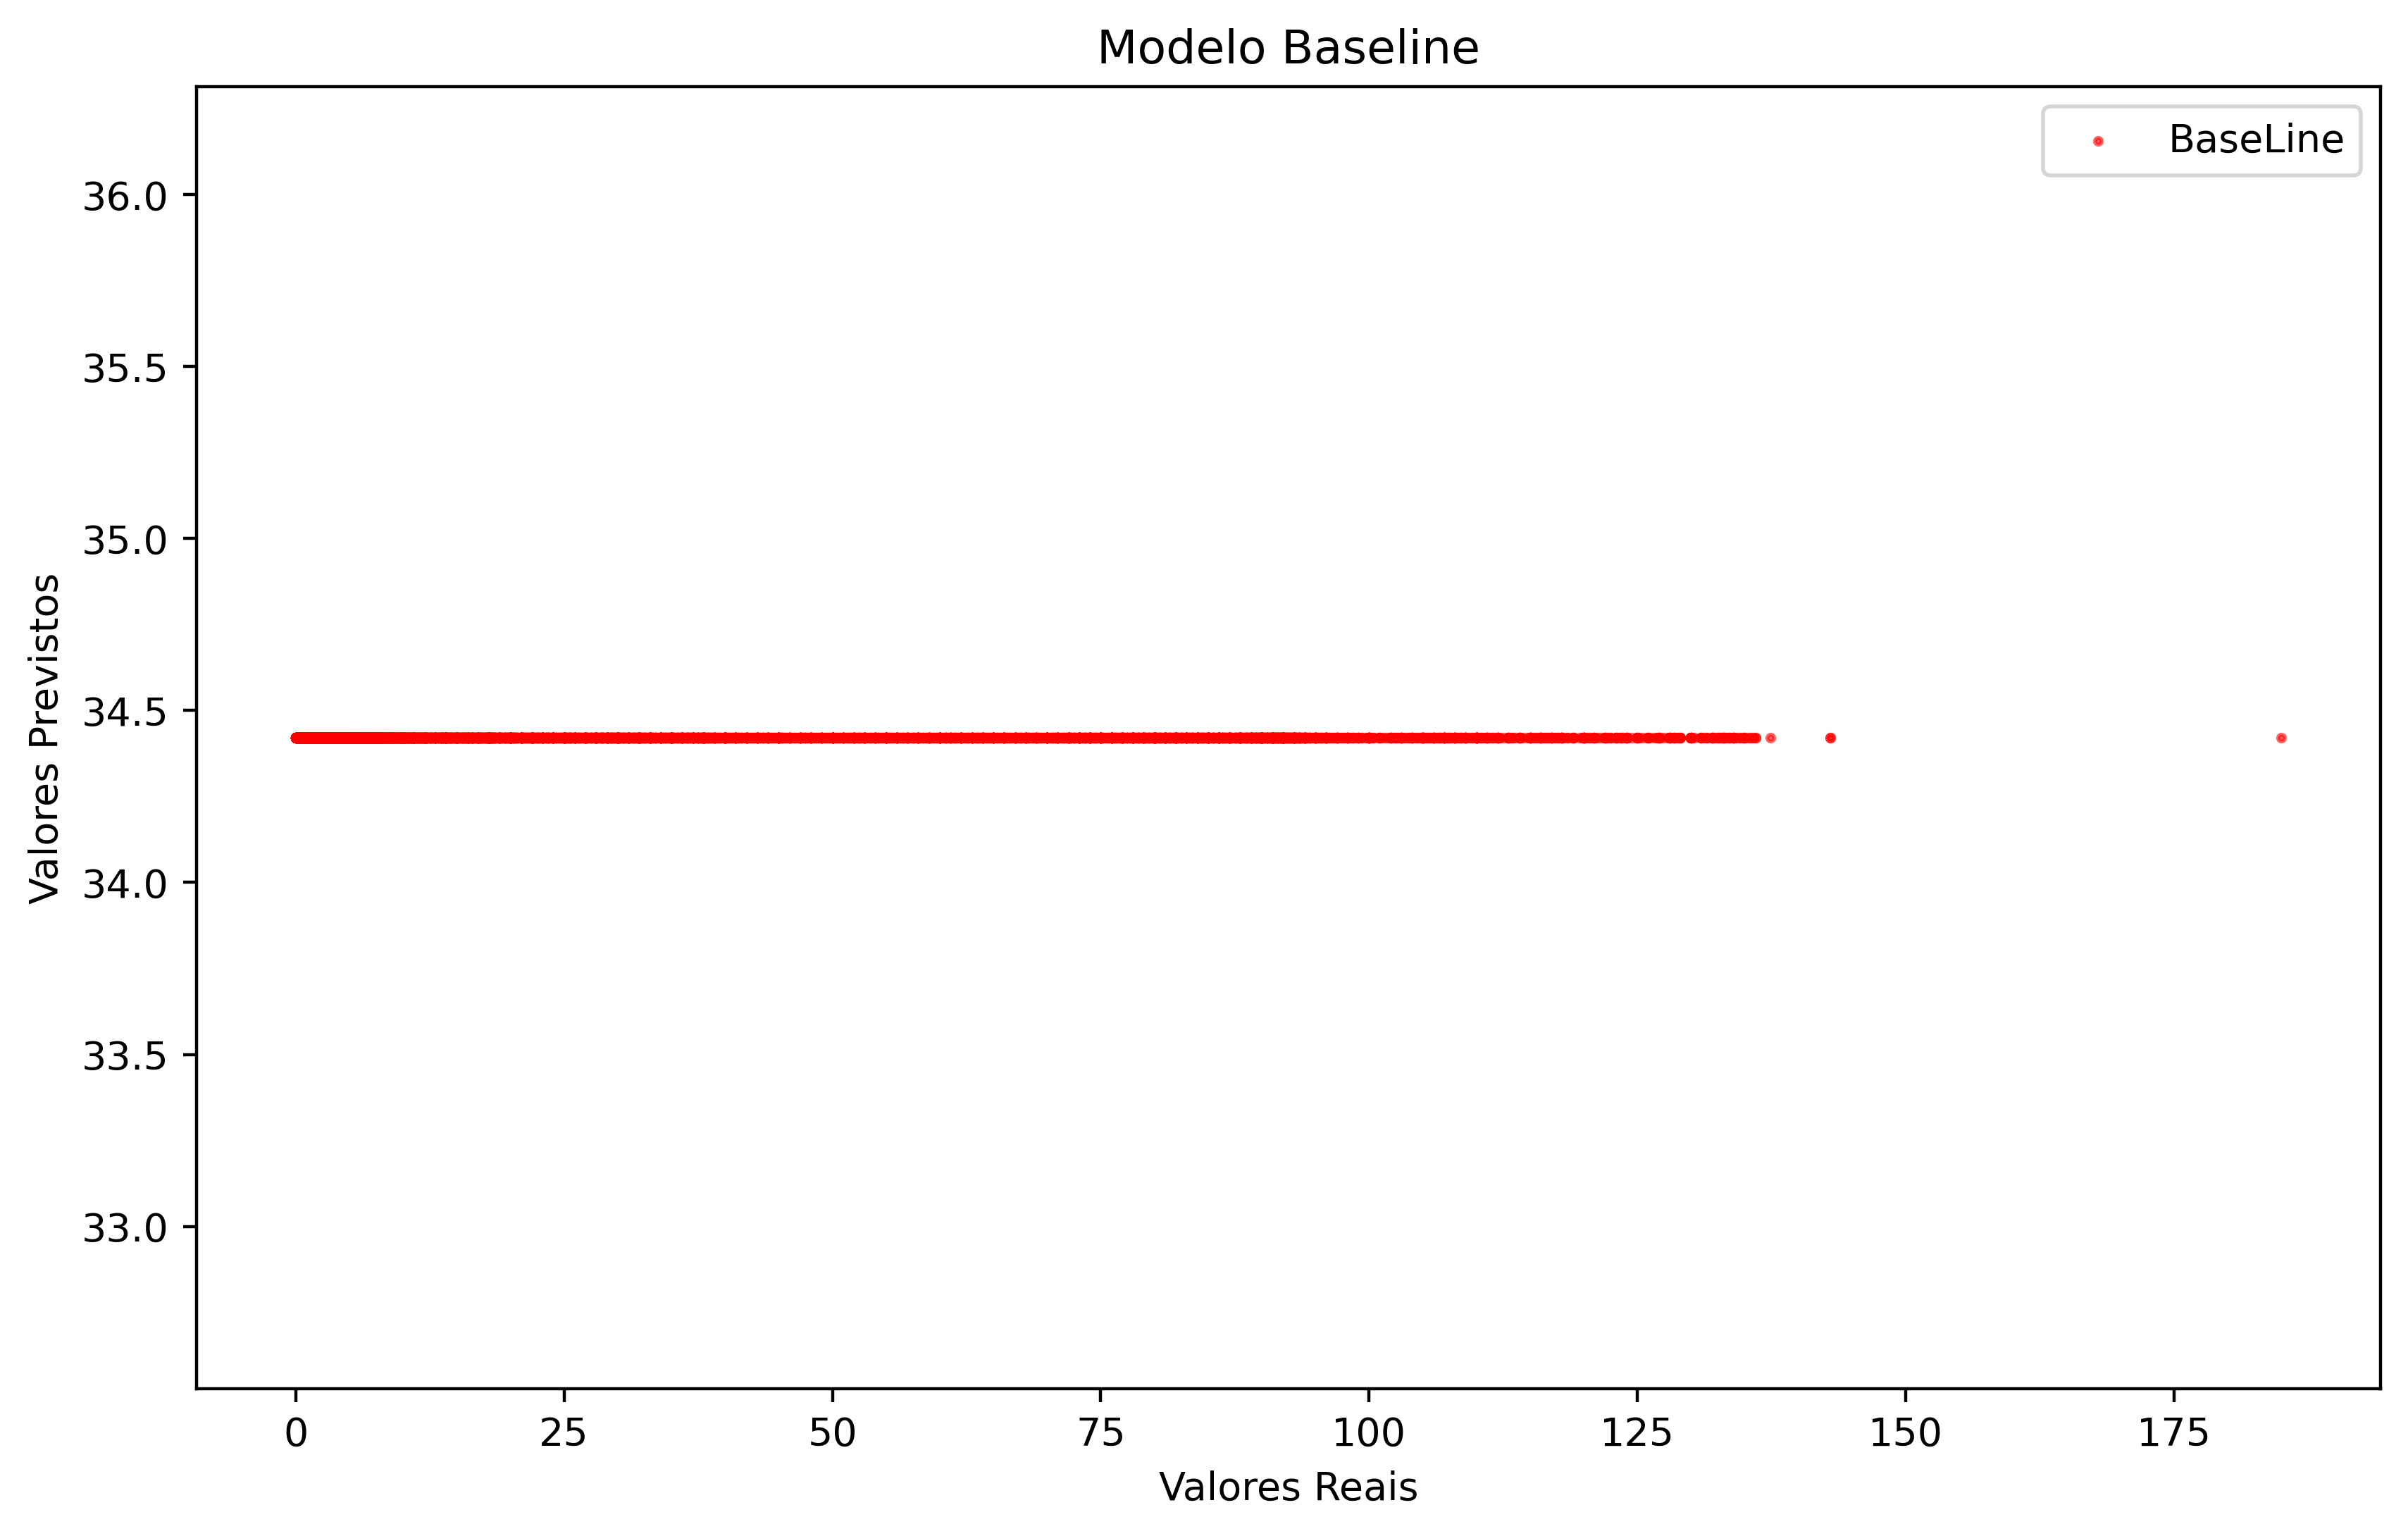

In [6]:
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X,y)

y_baseline = dummy_regr.predict(X)

y_baseline

plt.figure(figsize=(10, 6), dpi=400)

t = plt.scatter(x=y.values.ravel(), y=y_baseline, color='red', label='BaseLine', alpha=0.6,s=3)

plt.title('Modelo Baseline')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

RMSE_baseline = mean_squared_error(y, y_baseline, squared=False)

print(f'O RMSE do modelo baseline é de {RMSE_baseline} K')

O RMSE do modelo baseline é de 34.25355694704622 K


## <div id="lineares"> II.II - Modelos Lineares (LinearRegression e BayesianRidge)

<p style="text-align:justify;"> Os códigos das funções foram adaptados do material de aula do professor Dr. Daniel R. Cassar <sup><a href="#ref-7">[7]</a></sup>, os algoritmos de aprendizado de máquina utilizou-se <code>Scikit-Learn</code><sup><a href="#ref-8">[8]</a></sup>, para plotar os gráficos utilizou-se <code>Matplotlib</code><sup><a href="#ref-9">[9]</a></sup>.

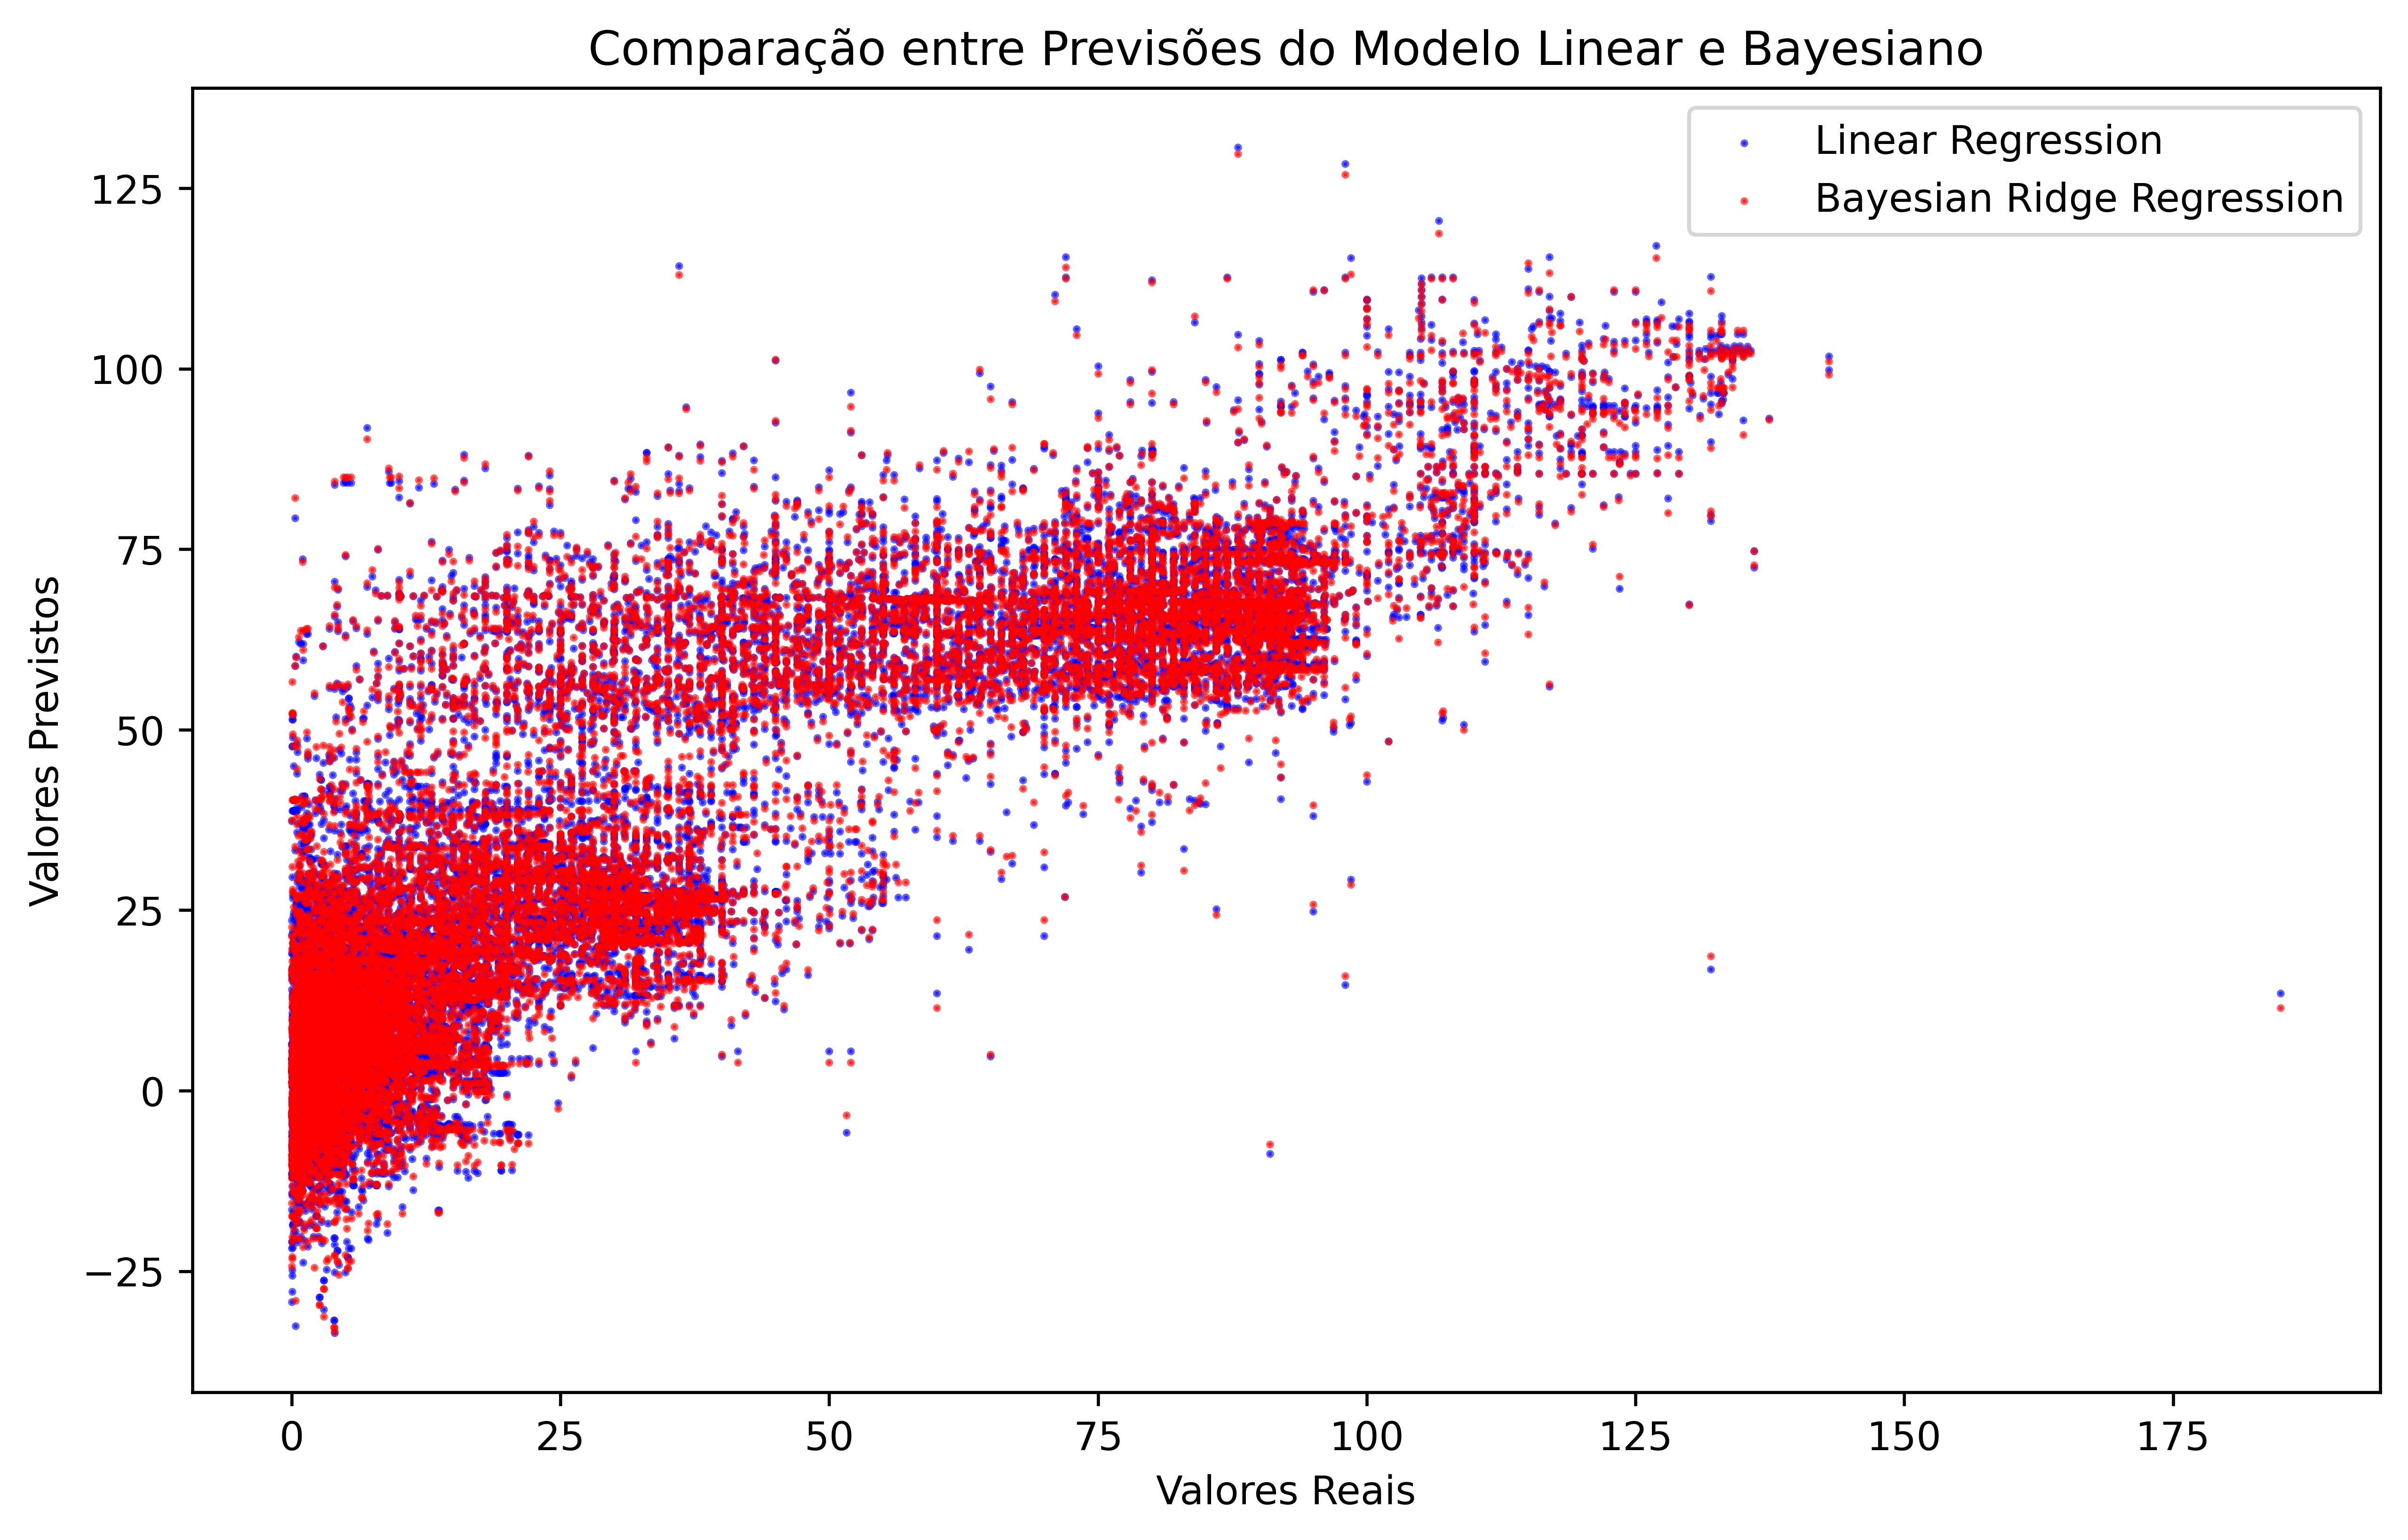

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression

modelo_linear = LinearRegression()
modelo_bayesian = BayesianRidge()

modelo_linear.fit(X_treino, y_treino)
modelo_bayesian.fit(X_treino, y_treino)

y_previsto_bayesian = modelo_bayesian.predict(X_treino)
y_previsto_linear = modelo_linear.predict(X_treino)

plt.figure(figsize=(10, 6), dpi=600)

plt.scatter(y_treino, y_previsto_linear, color='blue', label='Linear Regression', alpha=0.6,s=1)

plt.scatter(y_treino, y_previsto_bayesian, color='red', label='Bayesian Ridge Regression', alpha=0.6,s=1)

plt.title('Comparação entre Previsões do Modelo Linear e Bayesiano')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

<p style="text-align:justify;">Deste gráfico, podemos observar visualmente como as previsões são levemente diferentes, apesar de serem próximas.

<p style="text-align:justify;">Por fim, iremos analisar os resultados obtidos a partir da métrica RMSE (Erro Quadrático Médio) para o modelo linear tradicional e o modelo bayesiano.


In [9]:
from sklearn.metrics import mean_squared_error

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_linear.predict(X_verdadeiro)

RMSE_linear = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo linear foi de {RMSE_linear:0.4f} K")

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_bayesian.predict(X_verdadeiro)

RMSE_bayesiano = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo bayesiano foi de {RMSE_bayesiano:0.4f} K")

O RMSE do modelo linear foi de 17.4543 K
O RMSE do modelo bayesiano foi de 17.4629 K


## <div id="knn"> II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)

<p style="text-align:justify;"> Para evitar calcular cada regressor com os possíveis números de vizinhos próximos, utilizaremos a biblioteca <code>Optuna</code><sup><a href="#ref-10">[10]</a></sup>, que facilita o mapeamento de hiperparâmetros através de buscas bayesianas mais inteligentes. No geral essa biblioteca é útil quando tratando de mais de um hiperparâmetro ao mesmo tempo, mas aqui iremos focar apenas no número de vizinhos.

In [10]:
from sklearn.neighbors import KNeighborsRegressor


def cria_instancia_knn(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.

    """
    parametros = {
        "n_neighbors": trial.suggest_int("num_vizinhos", 1, 100),
        "n_jobs": -1,
    }

    model = KNeighborsRegressor(**parametros)

    return model

from sklearn.model_selection import cross_val_score

def funcao_objetivo_knn(trial, X, y, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo = cria_instancia_knn(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    #retorno negativo pelo comportamento padrão do scikit-learn em considerar a maior métrica como a melhor métrica
    return -metricas.mean()

In [11]:
"""Caso necessário, a biblioteca Optuna pode ser instalada pela linha abaixo"""
#!pip install optuna

from optuna import create_study

NOME_DO_ESTUDO = "knn-apenas-primeiro"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-21 01:02:42,365] Using an existing study with name 'knn-apenas-primeiro' instead of creating a new one.


O Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas. 

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna KNN](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Primeiro%20Dataset/knn-apenas-primeiro.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [12]:
NUM_FOLDS = 10

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_knn(trial, X_treino, y_treino, NUM_FOLDS)

NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()
df = df.dropna()

df

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
[I 2024-10-21 01:02:44,738] Trial 201 finished with value: 11.816051991985503 and parameters: {'num_vizinhos': 4}. Best is trial 12 with value: 10.419844663595686.


,number,value,datetime_start,datetime_complete,duration,params_num_vizinhos,state
0,0,12.248206,2024-10-21 00:26:59.886367,2024-10-21 00:27:02.255131,0 days 00:00:02.368764,18,COMPLETE
1,1,13.817032,2024-10-21 00:27:02.348133,2024-10-21 00:27:04.602084,0 days 00:00:02.253951,50,COMPLETE
2,2,14.838220,2024-10-21 00:27:04.685505,2024-10-21 00:27:07.353452,0 days 00:00:02.667947,97,COMPLETE
3,3,12.514344,2024-10-21 00:27:07.433995,2024-10-21 00:27:09.425031,0 days 00:00:01.991036,21,COMPLETE
4,4,13.881817,2024-10-21 00:27:09.500721,2024-10-21 00:27:11.687858,0 days 00:00:02.187137,52,COMPLETE
...,...,...,...,...,...,...,...
197,197,12.126288,2024-10-21 00:53:20.799804,2024-10-21 00:53:22.546041,0 days 00:00:01.746237,1,COMPLETE
198,198,11.551179,2024-10-21 00:53:22.618303,2024-10-21 00:53:24.436462,0 days 00:00:01.818159,3,COMPLETE
199,199,12.571820,2024-10-21 00:53:24.511550,2024-10-21 00:53:26.328273,0 days 00:00:01.816723,7,COMPLETE
200,200,16.631459,2024-10-21 00:53:26.385391,2024-10-21 00:53:28.715800,0 days 00:00:02.330409,56,COMPLETE


<p style="text-align:justify;"> Podemos analisar os resultados obtidos pela análise do optuna graficamente pelo código simples abaixo.

In [13]:
from sklearn.metrics import mean_squared_error

rmse_previsto = list()
modelo_knn = KNeighborsRegressor(n_neighbors=2)

modelo_knn.fit(X_treino, y_treino)
y_previsto = modelo_knn.predict(X_teste)

RMSE_knn = mean_squared_error(y_teste, y_previsto) ** (1/2)

print(f'O valor do RMSE para o modelo de k-NN foi de, aproximadamente, {RMSE_knn:0.4f} K')

O valor do RMSE para o modelo de k-NN foi de, aproximadamente, 11.5366 K


## <div id="floresta"> II.IV - Modelo de Floresta Aleatória

A função `cria_instancia_floresta` ajusta os hiperparâmetros do modelo com o **Optuna**, como o número de árvores e o critério de divisão, buscando equilibrar desempenho e generalização. A função `funcao_objetivo_floresta` aplica validação cruzada com 10 folds, e o **RMSE** negativo é usado como métrica, já que o objetivo é minimizar o erro.

O estudo é criado e armazenado em um banco de dados SQLite, permitindo reuso dos resultados, com `random_state` fixo para garantir reprodutibilidade.

In [14]:
from sklearn.ensemble import RandomForestRegressor

def cria_instancia_floresta(trial):
    parametros = {
        
        "n_estimators": trial.suggest_int("num_arvores", 10, 100),
        "criterion": trial.suggest_categorical(
            "critério", ["squared_error", "friedman_mse", "poisson"]
        ),
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("num_max_atributos", 0, 1),
        "n_jobs": -1,
        "bootstrap": True,
        "random_state": seed,
    }

    model = RandomForestRegressor(**parametros)

    return model

def funcao_objetivo_floresta(trial, X, y, num_folds):
    
    modelo = cria_instancia_floresta(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas.mean()


NOME_DO_ESTUDO = "random_forest_apenas_primeiro"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

NUM_FOLDS = 10
seed = 696969

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_floresta(trial, X_treino, y_treino, NUM_FOLDS)

[I 2024-10-21 01:02:45,362] Using an existing study with name 'random_forest_apenas_primeiro' instead of creating a new one.


Novamente, o Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas.

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna Random Forest](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Primeiro%20Dataset/random_forest_apenas_primeiro.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [15]:
NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

[I 2024-10-21 01:03:47,873] Trial 15 finished with value: 9.43429414005642 and parameters: {'num_arvores': 50, 'critério': 'poisson', 'min_exemplos_split': 3, 'min_exemplos_folha': 1, 'num_max_atributos': 0.2492564406554143}. Best is trial 9 with value: 9.235129100171143.


Número do melhor trial: 9
Parâmetros do melhor trial: {'num_arvores': 88, 'critério': 'squared_error', 'min_exemplos_split': 3, 'min_exemplos_folha': 1, 'num_max_atributos': 0.3545175252303513}


Utilizamos os hiperparâmetros obtidos anteriormente para criar uma nova instância do modelo com `cria_instancia_floresta(melhor_trial)`. Em seguida, o modelo é treinado com os dados de treinamento (`X_treino` e `y_treino`) usando o método `fit`.

Após o treinamento, fazemos previsões sobre os dados de teste (`X_teste`) e calculamos o **RMSE** (Root Mean Squared Error) com a função `mean_squared_error`, comparando os valores previstos (`y_previsao`) com os valores reais (`y_verdadeiro`).

In [16]:
modelo = cria_instancia_floresta(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

RMSE_floresta = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

print(f'O RMSE da floresta aleatória foi {RMSE_floresta} K')

O RMSE da floresta aleatória foi 9.448162428267127 K


____________________

# <div id="conclusao"> III. Conclusões

<p style="text-align:justify;">Nesta análise, foram aplicados diversos algoritmos de aprendizado de máquina — incluindo <b>Linear Regression</b>, <b>Bayesian Ridge</b>, <b>K-Nearest Neighbors (KNN)</b> e <b>Random Forest</b> — para prever a temperatura crítica de materiais supercondutores com base em características experimentais.

<p style="text-align:justify;">A tabela a seguir representa os valores de RMSE obtidos em cada modelo e nos diferentes datasets. Observa-se que, no <b>Primeiro Dataset</b>, os modelos de <b>Linear Regression</b> e <b>Bayesian Ridge</b> apresentaram os menores RMSEs (<b>17.4543</b> e <b>17.4629</b> , respectivamente). Esses valores foram menores do que o RMSE do modelo <b>BaseLine</b> (34.2536), o que indica uma melhora significativa. No entanto, os modelos de <b>K-nn</b> e <b>Random Forest</b> apresentaram melhores resultados no <b>Segundo Dataset</b>, com RMSEs de 10.5926 e 9.03722, respectivamente.

<p style="text-align:justify;">Ademais, nota-se a combinação dos datasets não obteve melhoras significativas nos resultados (quando comparada aos datasets isolados). Isso indica que nem sempre a adição de atributos leva a uma melhora na performance dos modelos. 


| Modelo            | Apenas o Dataset 1 | Apenas o Dataset 2 | Ambos os datasets |
|:-------------------:|:--------------------:|:--------------------:|:-------------------:|
| **Baseline**          | 34.2536            | 34.2536            | 34.2536           |
| **LinearRegression**   | **17.4543**            | 22.0200            | 18.2168           |
| **BayesianRidge**     | **17.4629**            | 22.0058            | 18.2070           |
| **K-nn**              | 11.5366            | **10.5926**            | 12.7433           |
| **Random Forest**     | 9.4482            | **9.03722**            | 13.1167           |


<p style="text-align:justify;">Para o <b>Primeiro Dataset</b>, o modelo <b>Random Forest</b> destacou-se com um <b>RMSE de 9.4482</b>, sendo menor do que o obtido ao utilizar a união das características dos supercondutores e maior que dos átomos que os compõem. Apesar disso, apresentou o melhor desempenho entre os algoritmos avaliados, embora ainda abaixo do ideal para previsões de temperatura. O <b>KNN</b> também mostrou resultados competitivos, mas com um <b>RMSE superior</b>.

<p style="text-align:justify;">Em resumo, o <b>melhor RMSE (9.03722)</b> foi obtido com o dataset de supercondutividade com o <b>Segundo Dataset</b>, utilizando o modelo de <b>Floresta Aleatória</b>.


____________________

# <div id="referencias"> IV. Referências

<div id="ref-1" style="text-align: justify;">
    <b>[1]</b> Hamidieh, K. (2018). A data-driven statistical model for predicting the critical temperature of a superconductor. Computational Materials Science, 154, 346-354. Disponível em: <a href="https://doi.org/10.1016/j.commatsci.2018.07.052">https://doi.org/10.1016/j.commatsci.2018.07.052</a>
</div>
</br>
<div id="ref-2" style="text-align: justify;">
    <b>[2]</b> Bardeen, J., Rickayzen, G., & Tewordt, L. (1959). Theory of the thermal conductivity of superconductors. Physical Review, 113(5), 982–994. Disponível em: <a href="https://doi.org/10.1103/PhysRev.113.982">https://doi.org/10.1103/PhysRev.113.982</a>
</div>
</br>
<div id="ref-3" style="text-align: justify;">
    <b>[3]</b> Stanev, V., Oses, C., Kusne, A. G., Rodriguez, E., Paglione, J., Curtarolo, S., & Takeuchi, I. (2018). Machine learning modeling of superconducting critical temperature. npj Computational Materials. Disponível em: <a href="https://doi.org/10.1038/s41524-018-0085-8">https://doi.org/10.1038/s41524-018-0085-8</a>
</div>
</br>
<div id="ref-4" style="text-align: justify;">
    <b>[4]</b> Kononenko, O., Adolphsen, C., Li, Z., Ng, C.-K., & Rivetta, C. (2017). 3D multiphysics modeling of superconducting cavities with a massively parallel simulation suite. Physical Review Accelerators and Beams, 20(10), 102001. Disponível em: <a href="https://doi.org/10.1103/PhysRevAccelBeams.20.102001">https://doi.org/10.1103/PhysRevAccelBeams.20.102001</a>
</div>
</br>
<div id="ref-5" style="text-align: justify;">
    <b>[5]</b> Tanaka, I., Rajan, K., & Wolverton, C. (2018). Data-centric science for materials innovation. MRS Bulletin, 43(9), 659–663. Disponível em: <a href="https://doi.org/10.1557/mrs.2018.217">https://doi.org/10.1557/mrs.2018.217</a>
</div>

</br>
<div id="ref-6" style="text-align: justify;">
    <b>[6]</b> Cassar, D. (2024). ATP-203 7.1 - Seleção de atributos. Arquivo local.
</div>

</br>
<div id="ref-7" style="text-align: justify;">
    <b>[7]</b> Cassar, D. (2024). ATP-203 3.0 - Modelo linear e baseline. Arquivo local.
</div>

</br>
<div id="ref-8" style="text-align: justify;">
    <b>[8]</b> Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Dufour, L. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Disponível em: <a href='http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf'>http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf</a>
</div>

</br>
<div id="ref-9" style="text-align: justify;">
    <b>[9]</b> Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. Disponível em: <a href='https://doi.org/10.1109/MCSE.2007.55'>https://doi.org/10.1109/MCSE.2007.55</a>
</div>

</br>
<div id="ref-10" style="text-align: justify;">
    <b>[10]</b> Akiba, T., Sano, S., Kawaguchi, K., & Yanase, T. (2019). Optuna: A next-generation hyperparameter optimization framework. Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, 2623-2631. Disponível em: <a href='https://doi.org/10.1145/3292500.3330664'>https://doi.org/10.1145/3292500.3330664</a>
</div>

